In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [58]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.dropna(how='all', inplace=True)

In [61]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [62]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

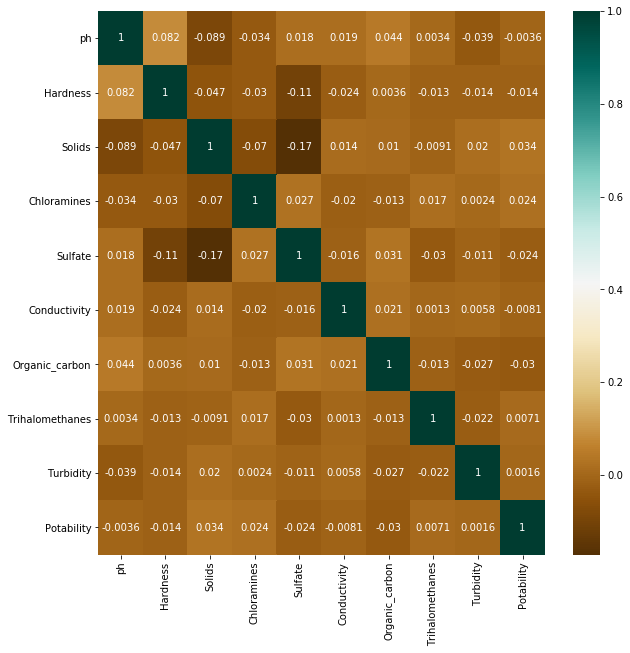

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='BrBG')

In [64]:
idx1 = df.query('Potability == 1')['ph'][df.ph.isna()].index
df.loc[idx1, 'ph'] = df.query('Potability == 1')['ph'][df.ph.notna()].mean()
idx0 = df.query('Potability == 0')['ph'][df.ph.isna()].index
df.loc[idx0,'ph'] = df.query('Potability==0')['ph'][df.ph.notna()].mean()

idx1 = df.query('Potability == 1')['Sulfate'][df.Sulfate.isna()].index
df.loc[idx1, 'Sulfate'] = df.query('Potability == 1')['Sulfate'][df.Sulfate.notna()].mean()
idx0 = df.query('Potability == 0')['Sulfate'][df.Sulfate.isna()].index
df.loc[idx0,'Sulfate'] = df.query('Potability==0')['Sulfate'][df.Sulfate.notna()].mean()

idx1 = df.query('Potability == 1')['Trihalomethanes'][df.Trihalomethanes.isna()].index
df.loc[idx1, 'Trihalomethanes'] = df.query('Potability == 1')['Trihalomethanes'][df.Trihalomethanes.notna()].mean()
idx0 = df.query('Potability == 0')['Trihalomethanes'][df.Trihalomethanes.isna()].index
df.loc[idx0,'Trihalomethanes'] = df.query('Potability==0')['Trihalomethanes'][df.Trihalomethanes.notna()].mean()

df.loc[~df.ph.between(6.5, 8.5), 'Potability'] = 0

In [65]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [67]:
X = df.drop(['Potability'], axis = 1).values
y = df['Potability'].values

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [75]:
#Hyperparameter tuning ;)

lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#parameters for decision tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#parameters fpr AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
#parameters for xgboost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)


In [76]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

[22:20:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:20:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:20:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are 

[22:20:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:20:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:20:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are 

[22:20:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:20:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:20:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are 

In [77]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_leaf=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=16)
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, random_state=42)
ada = AdaBoostClassifier(n_estimators= 50, learning_rate=0.8)
xgb = XGBClassifier(n_estimators= 50, learning_rate= 0.5)

#let's also apply bagging and boosting
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, random_state=42),
                           n_estimators = 500, random_state = 42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=7,
                                                        min_samples_leaf=2,
                                                        random_state=42),
                  n_estimators=500, random_state=42)

In [78]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Bagging Classifier', bagging), ('XGBoost', xgb)]

In [79]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:
 
    # Fit clf to the training set
    classifier.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    

   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.73
K Nearest Neighbours : 0.74
Decision Tree : 0.87
Random Forest : 0.87
AdaBoost : 0.86
Bagging Classifier : 0.86
XGBoost : 0.86


In [84]:
from sklearn.metrics import classification_report

y_pred_rf= xgb.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       482
           1       0.76      0.72      0.74       174

    accuracy                           0.86       656
   macro avg       0.83      0.82      0.82       656
weighted avg       0.86      0.86      0.86       656



In [85]:
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix
print(precision_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))

0.7575757575757576
0.7183908045977011


In [86]:
print(confusion_matrix(y_test, y_pred_rf))

[[442  40]
 [ 49 125]]


In [89]:
import pickle
filename = 'xgboost.sav'
pickle.dump(xgb, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open('xgboost.sav', 'rb'))

In [90]:
filename = 'scaler.sav'
pickle.dump(sc, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
scc = pickle.load(open('scaler.sav', 'rb'))

In [4]:
import pickle
loaded_model = pickle.load(open('xgboost.sav', 'rb'))
scc = pickle.load(open('scaler.sav', 'rb'))

In [10]:
data = df.iloc[3:4, :-1].values

In [11]:
data

array([[8.31676588e+00, 2.14373394e+02, 2.20184174e+04, 8.05933238e+00,
        3.56886136e+02, 3.63266516e+02, 1.84365245e+01, 1.00341674e+02,
        4.62877054e+00]])

In [7]:
sc_data = scc.transform(data)

In [8]:
sc_data

array([[ 8.40908294e-01,  5.47651374e-01,  4.93304442e-04,
         5.92007821e-01,  6.39205723e-01, -7.78829962e-01,
         1.25513443e+00,  2.15291047e+00,  8.48411520e-01]])

In [9]:
loaded_model.predict(sc_data)

array([0], dtype=int64)

In [12]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
